In [320]:
import jieba
import jieba.analyse as anly
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

file_name = '词云.xlsx'
file = pd.ExcelFile(file_name)
data = pd.read_excel(file, "OriginData", header=None)

data = data.dropna(axis=0)
data[0] = data[0][1:]

In [321]:
data = data.drop(0, axis=0)

In [322]:
data.dropna(inplace=True)

In [323]:
data.values[1][0]
lst = list(range(1, len(data[0]) + 1))
data.index = lst

data.index = data.index.map(lambda x: str(x))
# data.apply()
# for i in range(len(data)):
#     print(data.iloc[i])
data.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088',
       '1089'],
      dtype='object', length=1089)

In [324]:
word_lst = ['没有', '无', 'wu']
length = len(data)
print(length)
for i in range(1, length+1):
    flg = False
    for word in word_lst:
        if word in data.loc[str(i), 0] or str.isnumeric(data.loc[str(i), 0]):
            flg = True
    if flg:
        data.drop(labels=str(i), axis=0, inplace=True)

1089


In [325]:
str1 = 'hell'
str2 = 'hello'
str1 in str2

True

In [326]:
lst = list(range(1, len(data[0]) + 1))
data.index = lst
data

,0
1,好好好
2,推广力度小
3,轻食食材新鲜
4,加强监管力度宣传力度
5,希望多一些种类，调整一下价格
...,...
524,多元化
525,行业规范
526,优秀
527,价格高


In [327]:
# 加载停用词表
text_stopwords = open("StopWord.txt", 'r', encoding='utf-8')

In [328]:
stopwords = [line.strip() for line in text_stopwords]
stopwords.extend(['，', '口臭', '臭', '轻食'])

In [329]:
# 读取文本 并未去除停用词
import pandas as pd
import jieba

def cut_word(word):
    cw = jieba.cut(word)
    return list(cw)

data['cut_word'] = data[0].apply(cut_word)

info = pd.Series(data['cut_word'].sum()) # sum 什么鬼函数

info.index = range(1, len(info) + 1)
info

1       好好
2        好
3       推广
4       力度
5        小
        ..
2342     高
2343    科学
2344    饮食
2345     很
2346    重要
Length: 2346, dtype: object

In [330]:
text_lst = list((info.values))

In [331]:
text_split_no = []    #从停词表中删除
for text in text_lst:
    text = text.strip()
    if text in stopwords or text.isdigit():
        continue
    else:
        text_split_no.append(text)

In [332]:
text_split_no_str = ' '.join(text_split_no)  # 将list类型转换为str

In [333]:
# 基于TF-IDF提取关键词
keywords = []                                # 创建空列表（list）
for x, w in anly.extract_tags(text_split_no_str, topK=50, withWeight=True):
    keywords.append(x)                       # 前50关键词组成的list
keywords = ' '.join(keywords)                # 将list类型转换为str
print("基于TF-IDF提取的前50个关键词：",keywords)

基于TF-IDF提取的前50个关键词： 健康 营养 口味 宣传 卫生 搭配 价格 均衡 希望 力度 提高 性价比 加大 推广 好吃 食材 美味 口感 多样化 种类 一点 保证 市场 荤素 饮食 产品 监管 加油 质量 降低 价格便宜 便宜 味道 减肥 食品 营养成分 不错 品质 安全卫生 感觉 越来越 注重 产品质量 规范 消费 多元化 大众 噱头 品种 行业


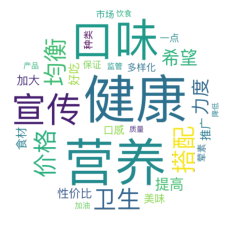

In [337]:
# 制作词云图
# 绘制词云图
bg = np.array(Image.open("图片1.jpg"))        # 读取背景形状,形状背景必须为纯白
wordcloud = WordCloud(
    font_path="/System/Library/Fonts/pingfang.ttc",  # 设置字体
    background_color=None,                      # 设置背景颜色为空
    mode="RGBA",                                # 设置背景为透明
    width=1000,                                 # 设置画布宽度为1000像素
    height=800,                                 # 设置画布高度为800像素
    prefer_horizontal= 0.8,                     # 词语水平方向排版出现的频率
    scale=1.2,                                  # 画布放大倍数
    margin=10,                                  # 设置词云图的边缘宽度
    max_font_size=90,                           # 设置词云图中最大字号
    min_font_size=10,                           # 设置词云图中最小字号
    random_state=50,                            # 设置词云图随机配色方案
    mask=bg,                                    # 套用背景形状
    ).generate(keywords)                        # 根据文本生成词云,generate_from_text(text)的简写

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("WordCloudPicture1.png")

In [335]:
bg

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)